# Importing required libraries

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img ,img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# Spesify the directory

In [2]:
my_data_dir = 'Data/casting_data/'
train_path = my_data_dir + 'train/'
test_path = my_data_dir + 'test/'

image_shape = (300,300,1)
batch_size = 32 

# Preview the datasets

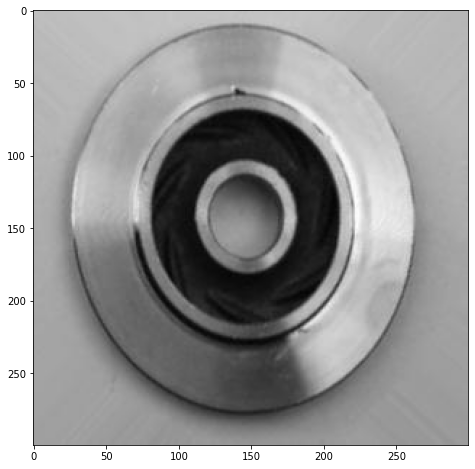

In [3]:
img = plt.imread('Data/casting_data/train/def_front/cast_def_0_1001.jpeg')
plt.figure(figsize=(12,8))
plt.imshow(img,cmap='gray')

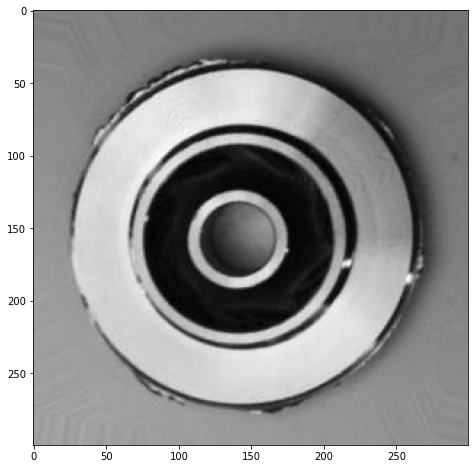

In [4]:
img1 = plt.imread('Data/casting_data//train/def_front/cast_def_0_1004.jpeg')
plt.figure(figsize=(12,8))
plt.imshow(img1,cmap='gray')

# Data Preprocessing

In [5]:
image_gen = ImageDataGenerator(rescale=1/255)

In [6]:
train_set = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode="grayscale",
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=True)

test_set = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode="grayscale",
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 6633 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


In [7]:
train_set.class_indices

{'def_front': 0, 'ok_front': 1}

## Defect Product = 0
## Ok Product = 1 

# Building Neural Network Model

In [8]:
model = Sequential()

model.add(Conv2D(filters=8, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(224))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [9]:
results = model.fit_generator(train_set,epochs=20,
                              validation_data=test_set,
                             callbacks=[early_stop])

Epoch 1/20
208/208 [==============================] - 13s 48ms/step - loss: 0.4638 - accuracy: 0.7660 - val_loss: 0.2011 - val_accuracy: 0.9455
Epoch 2/20
208/208 [==============================] - 9s 44ms/step - loss: 0.1474 - accuracy: 0.9507 - val_loss: 0.1001 - val_accuracy: 0.9608
Epoch 3/20
208/208 [==============================] - 9s 44ms/step - loss: 0.0828 - accuracy: 0.9730 - val_loss: 0.1046 - val_accuracy: 0.9510
Epoch 4/20
208/208 [==============================] - 9s 45ms/step - loss: 0.0464 - accuracy: 0.9855 - val_loss: 0.0943 - val_accuracy: 0.9538
Epoch 5/20
208/208 [==============================] - 10s 47ms/step - loss: 0.0300 - accuracy: 0.9929 - val_loss: 0.0203 - val_accuracy: 0.9944
Epoch 6/20
208/208 [==============================] - 10s 46ms/step - loss: 0.0176 - accuracy: 0.9950 - val_loss: 0.0275 - val_accuracy: 0.9916
Epoch 7/20
208/208 [==============================] - 9s 45ms/step - loss: 0.0385 - accuracy: 0.9863 - val_loss: 0.0155 - val_accuracy: 0.9

# Plotting the results

<AxesSubplot:>

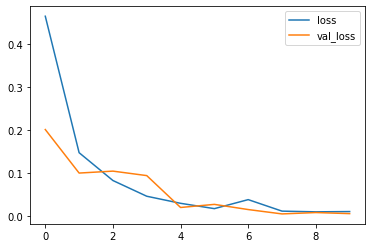

In [10]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

<AxesSubplot:>

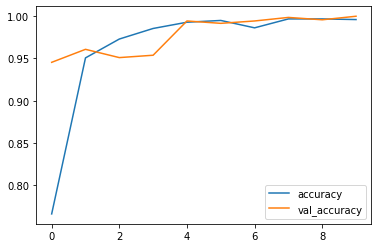

In [11]:
losses[['accuracy','val_accuracy']].plot()

# Apply the model on test data

In [12]:
pred_probability = model.predict_generator(test_set)
test_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [13]:
predictions = pred_probability > 0.5

In [14]:
print(classification_report(test_set.classes,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       453
           1       1.00      1.00      1.00       262

    accuracy                           1.00       715
   macro avg       1.00      1.00      1.00       715
weighted avg       1.00      1.00      1.00       715



<AxesSubplot:>

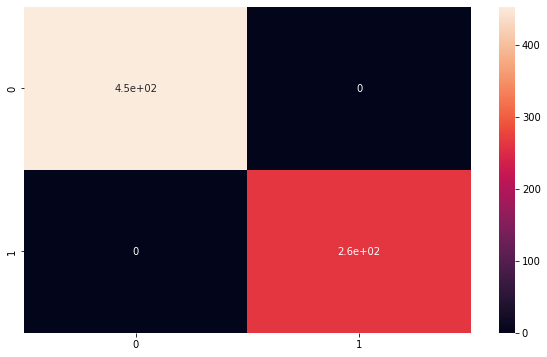

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(test_set.classes,predictions),annot=True)

# Predict on random data

In [16]:
img = cv2.imread(test_path+'ok_front/cast_ok_0_1020.jpeg',0)
img = img/255
pred_img =img.copy()

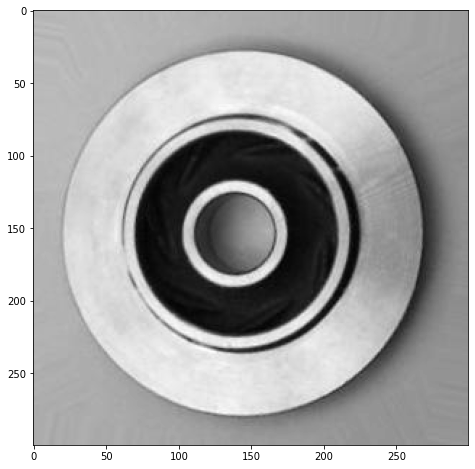

In [17]:
plt.figure(figsize=(12,8))
plt.imshow(img,cmap='gray')

ok_front


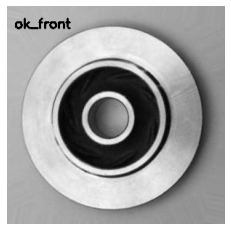

In [18]:
prediction = model.predict(img.reshape(-1,300,300,1))
if (prediction<0.5):
    print("def_front")
    cv2.putText(pred_img, "def_front", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
else:
    print("ok_front")
    cv2.putText(pred_img, "ok_front", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
    
plt.imshow(pred_img,cmap='gray')
plt.axis('off')
plt.show()

In [19]:
img1 = cv2.imread(test_path+'def_front/cast_def_0_1134.jpeg',0)
img1 = img1/255
pred_img1 =img1.copy()

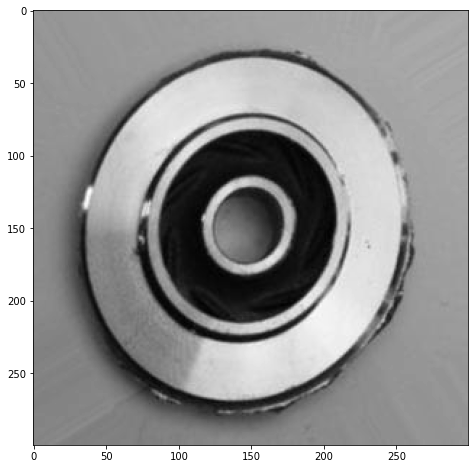

In [20]:
plt.figure(figsize=(12,8))
plt.imshow(img1,cmap='gray')

def_front


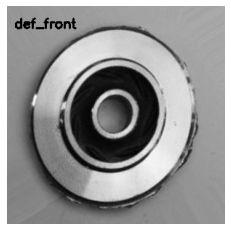

In [21]:
prediction = model.predict(img1.reshape(-1,300,300,1))
if (prediction<0.5):
    print("def_front")
    cv2.putText(pred_img1, "def_front", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
else:
    print("ok_front")
    cv2.putText(pred_img1, "ok_front", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
    
plt.imshow(pred_img1,cmap='gray')
plt.axis('off')
plt.show()

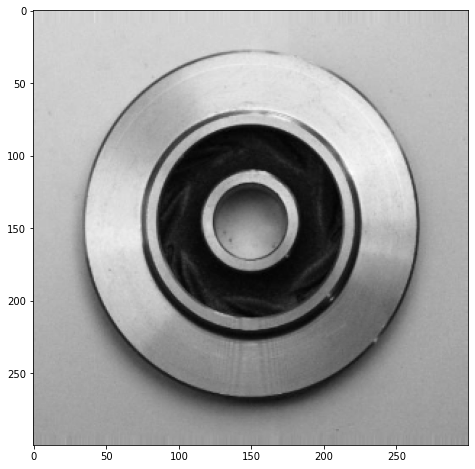

In [23]:
img1 = cv2.imread('ok.jpeg',0)
img1 = cv2.resize(img1,(300,300))
img1 = img1/255
pred_img1 =img1.copy()

plt.figure(figsize=(12,8))
plt.imshow(img1,cmap='gray')

ok_front
[[0.9999747]]


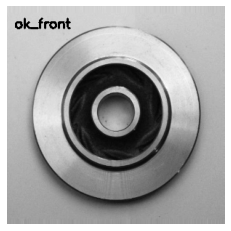

In [24]:
prediction = model.predict(img1.reshape(-1,300,300,1))
if (prediction<0.5):
    print("def_front")
    cv2.putText(pred_img1, "def_front", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
else:
    print("ok_front")
    cv2.putText(pred_img1, "ok_front", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
print(prediction)    
plt.imshow(pred_img1,cmap='gray')
plt.axis('off')
plt.show()

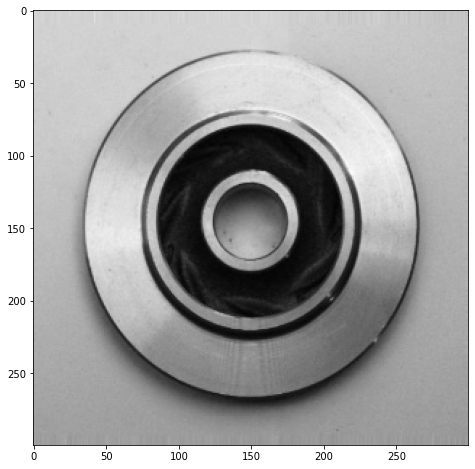

In [25]:
img2 = cv2.imread('def.jpeg',0)
img2 = cv2.resize(img1,(300,300))
img2 = img2/255
pred_img2 =img2.copy()

plt.figure(figsize=(12,8))
plt.imshow(img2,cmap='gray')

def_front


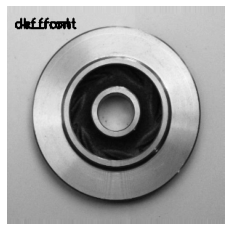

In [26]:
prediction = model.predict(img2.reshape(-1,300,300,1))
if (prediction<0.5):
    print("def_front")
    cv2.putText(pred_img1, "def_front", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
else:
    print("ok_front")
    cv2.putText(pred_img1, "ok_front", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
    
plt.imshow(pred_img1,cmap='gray')
plt.axis('off')
plt.show()

# saving the model

In [27]:
model.save('Defect Product Classification.h5')